In [1]:
import geodatasets
import geopandas as gpd

nepal = gpd.read_file(geodatasets.get_path('geoda.nepal'))

nepal = nepal.rename(columns={"name_2": "zone"})  # rename to remember the column

nepal[["zone", "geometry"]].head()

c:\Users\priti\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


,zone,geometry
0,Dhaualagiri,"POLYGON ((83.10834 28.6202, 83.1056 28.60976, ..."
1,Dhaualagiri,"POLYGON ((83.99726 29.31675, 84 29.31576, 84 2..."
2,Dhaualagiri,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,Dhaualagiri,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,Bagmati,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."


,geometry
zone,
Bagmati,"POLYGON ((85.87653 27.61234, 85.87355 27.60861..."
Bheri,"POLYGON ((81.75089 28.31038, 81.75562 28.3074,..."
Dhaualagiri,"POLYGON ((83.70647 28.39278, 83.70721 28.38781..."
Gandaki,"POLYGON ((84.49995 28.74099, 84.50443 28.7441,..."
Janakpur,"POLYGON ((86.26166 26.91417, 86.2588 26.91144,..."


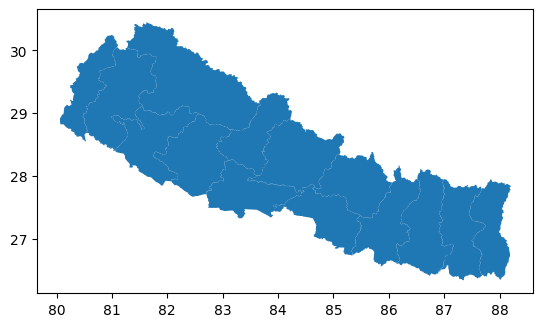

In [2]:
nepal_zone = nepal[['zone', 'geometry']]

zones = nepal_zone.dissolve(by='zone')

zones.plot()
zones.head()



In [3]:
import sys
print(sys.executable)
!{sys.executable} -m pip install geodatasets


c:\Users\priti\anaconda3\python.exe


In [8]:
import mapclassify

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

c:\Users\priti\anaconda3\lib\site-packages\geopandas\geodataframe.py:2261: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc, **kwargs)


,geometry,population
zone,,
Bagmati,"POLYGON ((85.87653 27.61234, 85.87355 27.60861...",42125
Bheri,"POLYGON ((81.75089 28.31038, 81.75562 28.3074,...",170090
Dhaualagiri,"POLYGON ((83.70647 28.39278, 83.70721 28.38781...",11585
Gandaki,"POLYGON ((84.49995 28.74099, 84.50443 28.7441,...",5827
Janakpur,"POLYGON ((86.26166 26.91417, 86.2588 26.91144,...",184931


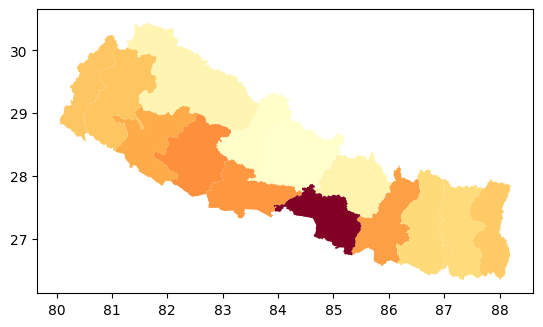

In [10]:
nepal_pop = nepal[['zone', 'geometry', 'population']]

zones = nepal_pop.dissolve(by='zone', aggfunc=min)

zones.plot(column = 'population', cmap='YlOrRd')

zones.head()

AttributeError: PatchCollection.set() got an unexpected keyword argument 'aggfunc'

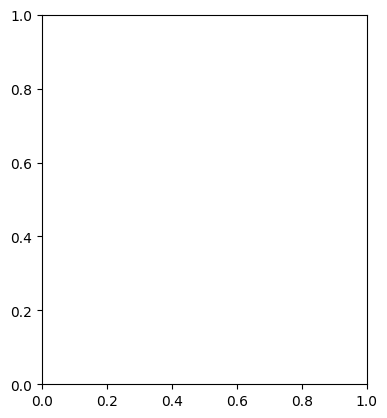

In [ ]:
zones = nepal.dissolve(
     by="zone",
     aggfunc={
         "district": "count",
         "population": ["min", "max"],
     },
 )
# ... existing code ...
zones.plot(column = ('population', 'min'), cmap='YlOrRd')
# ... existing code ...
